In [1]:
import pandas as pd
#from google.colab import drive
#import os

#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/Colab Notebooks/Pengantar Sains Data/X-Scraping-NRE')

# Load the dataset to examine its structure
file_path = 'hasil-scraping-NRE-X.csv'
data = pd.read_csv(file_path)

# Display the basic structure and a summary of the dataset
data_info = {
    "columns": data.columns.tolist(),
    "num_rows": len(data),
    "num_columns": len(data.columns),
    "sample_data": data.head()
}

data_info


{'columns': ['User ID', 'Date Created', 'Tweet Text', 'Tweet URL'],
 'num_rows': 1095,
 'num_columns': 4,
 'sample_data':                User ID               Date Created  \
 0  1666328210127327233  2025-01-02 08:18:21+00:00   
 1             23343960  2025-01-02 08:13:32+00:00   
 2  1456213681176408067  2025-01-02 08:07:42+00:00   
 3  1431858075565105163  2025-01-02 08:05:59+00:00   
 4  1745850243269492736  2025-01-02 07:55:18+00:00   
 
                                           Tweet Text  \
 0  Gas bumi adalah solusi energi bersih yang terj...   
 1  Sejumlah dampak buruk dari deforestasi yang be...   
 2  kok iso dadi presiden ngene iki, aku ae sma ma...   
 3  Gas bumi adalah solusi energi bersih yang terj...   
 4  Belom jg 3 bulan ngejabat. Wowok and the gang ...   
 
                                            Tweet URL  
 0  https://twitter.com/twitter/status/18747319460...  
 1  https://twitter.com/twitter/status/18747307349...  
 2  https://twitter.com/twitter/status/18

In [2]:
import re

# 1. Pahami Struktur Data
# Dataset sudah diperiksa sebelumnya: terdapat kolom `Tweet Text` dan relevan untuk analisis.

# 2. Periksa Duplikasi
data_cleaned = data.drop_duplicates(subset=['Tweet Text'])

# 3. Periksa Data Kosong
data_cleaned = data_cleaned.dropna(subset=['Tweet Text', 'Date Created'])

# 4. Filter Topik yang Relevan
# Keyword filtering untuk energi terbarukan
keywords = r"\b(energi|renewable|ebt|energi terbarukan|solar|wind|geothermal|hydro|energy|" \
           r"clean energy|sustainability|biomass|biofuel|gas bumi|pembangkit listrik|plts|" \
           r"pltb|plta|climate change|perubahan iklim|net zero|carbon neutral|" \
           r"green energy|transisi energi)\b"

data_cleaned = data_cleaned[data_cleaned['Tweet Text'].str.contains(keywords, flags=re.IGNORECASE, na=False)]

# 5. Preprocessing Teks
def preprocess_text(text):
    # Hilangkan tautan, simbol, angka, dan karakter khusus
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

data_cleaned['Cleaned Tweet'] = data_cleaned['Tweet Text'].apply(preprocess_text)

# Menyimpan hasil pembersihan untuk eksplorasi berikutnya
data_cleaned_summary = {
    "total_rows_after_cleaning": len(data_cleaned),
    "sample_cleaned_data": data_cleaned[['Cleaned Tweet']].head()
}

data_cleaned_summary

C:\Users\ME\AppData\Local\Temp\ipykernel_12200\1419815156.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_cleaned = data_cleaned[data_cleaned['Tweet Text'].str.contains(keywords, flags=re.IGNORECASE, na=False)]


{'total_rows_after_cleaning': 449,
 'sample_cleaned_data':                                        Cleaned Tweet
 0  gas bumi adalah solusi energi bersih yang terj...
 3  gas bumi adalah solusi energi bersih yang terj...
 5  pemerintah meningkatkan target penggunaan ener...
 6  upaya ini untuk memastikan transisi energi ber...
 7  pemerintah meningkatkan target penggunaan ener...}

[('energi', 506), ('baru', 331), ('tahun', 209), ('indonesia', 156), ('rakyat', 148), ('bumi', 145), ('gas', 143), ('pln', 120), ('terbarukan', 116), ('bersih', 113)]


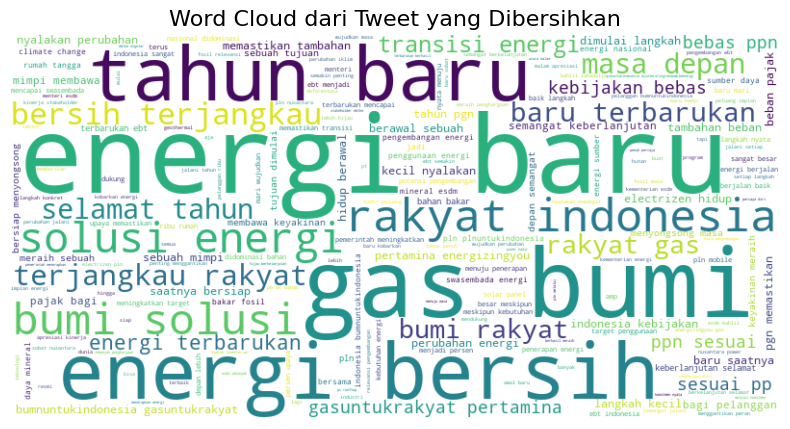

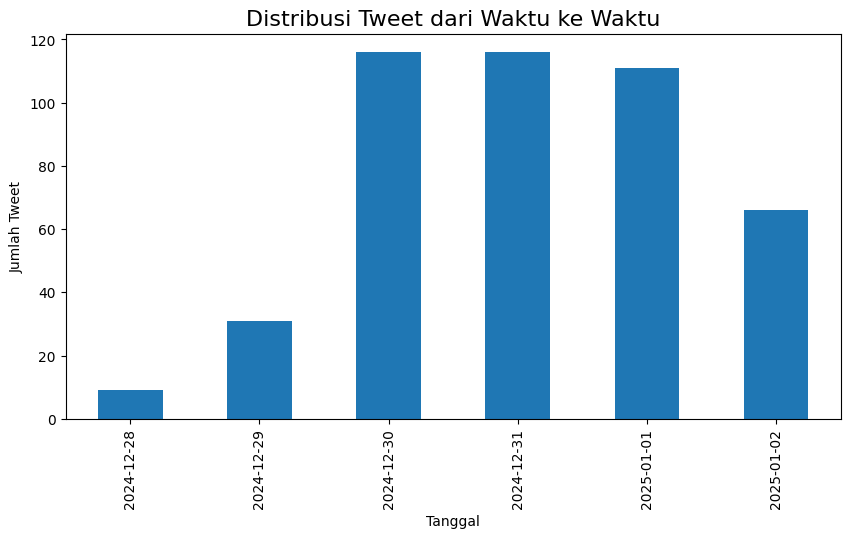

Distribusi Jumlah Tweet Berdasarkan Tanggal:
Date Created
2024-12-28      9
2024-12-29     31
2024-12-30    116
2024-12-31    116
2025-01-01    111
2025-01-02     66
Name: count, dtype: int64


In [3]:
#!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import numpy as np
import pandas as pd

# Asumsikan 'data_cleaned' adalah DataFrame Anda dan 'Cleaned Tweet' adalah kolom dengan data teks

# 1. Analisis Deskriptif - Frekuensi Kata

# Definisikan stop words dalam Bahasa Indonesia
stop_words_indonesia = [
    'yang', 'yg', 'di', 'dan', 'dari', 'ke', 'dengan', 'untuk', 'pada', 'ini', 'juga',
    'ada', 'tidak', 'telah', 'oleh', 'namun', 'serta', 'sebagai', 'ia', 'karena',
    'saat', 'harus', 'sehingga', 'setelah', 'belum', 'kami', 'sementara', 'lain',
    'begitu', 'agar', 'dalam', 'tersebut', 'kita', 'antara', 'ia', 'akan', 'masih',
    'sudah', 'bahwa', 'hanya', 'dapat', 'jika', 'ga', 'ya', 'mm', 'apa', 'itu', 'adalah'
]

# Inisialisasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words=stop_words_indonesia
)
text_data_matrix = vectorizer.fit_transform(data_cleaned['Cleaned Tweet'])

# Mendapatkan nama fitur (kata) setelah menghapus stop words
feature_names = vectorizer.get_feature_names_out()

# Menjumlahkan kemunculan setiap kata dalam matriks dokumen-term
word_counts = np.array(text_data_matrix.sum(axis=0)).flatten()

# Membuat dictionary frekuensi kata
word_freq = dict(zip(feature_names, word_counts))

# Mendapatkan 10 kata paling umum
most_common_words = Counter(word_freq).most_common(10)
print(most_common_words)

# 2. Visualisasi - Word Cloud

# Menggabungkan semua kata tanpa stop words menggunakan kosakata dari vectorizer
all_words = ' '.join([word for word in data_cleaned['Cleaned Tweet'].str.split().sum() if word in feature_names])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Tweet yang Dibersihkan", fontsize=16)
plt.show()

# 3. Analisis Distribusi Temporal

# Mengubah kolom 'Date Created' ke format datetime untuk analisis waktu
data_cleaned['Date Created'] = pd.to_datetime(data_cleaned['Date Created'], errors='coerce')

# Menghitung distribusi tweet berdasarkan tanggal
tweet_distribution = data_cleaned['Date Created'].dt.date.value_counts().sort_index()

# Menampilkan histogram distribusi tweet berdasarkan tanggal
plt.figure(figsize=(10, 5))
tweet_distribution.plot(kind='bar')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.title("Distribusi Tweet dari Waktu ke Waktu", fontsize=16)
plt.show()

# Mencetak distribusi tweet dalam bentuk tabel
print("Distribusi Jumlah Tweet Berdasarkan Tanggal:")
print(tweet_distribution)

Jumlah Topik: 2, Coherence Score: 0.3523
Jumlah Topik: 3, Coherence Score: 0.6579
Jumlah Topik: 4, Coherence Score: 0.7209
Jumlah Topik: 5, Coherence Score: 0.6053
Jumlah Topik: 6, Coherence Score: 0.7118
Jumlah Topik: 7, Coherence Score: 0.6017
Jumlah Topik: 8, Coherence Score: 0.5935
Jumlah Topik: 9, Coherence Score: 0.5842
Jumlah Topik: 10, Coherence Score: 0.5796


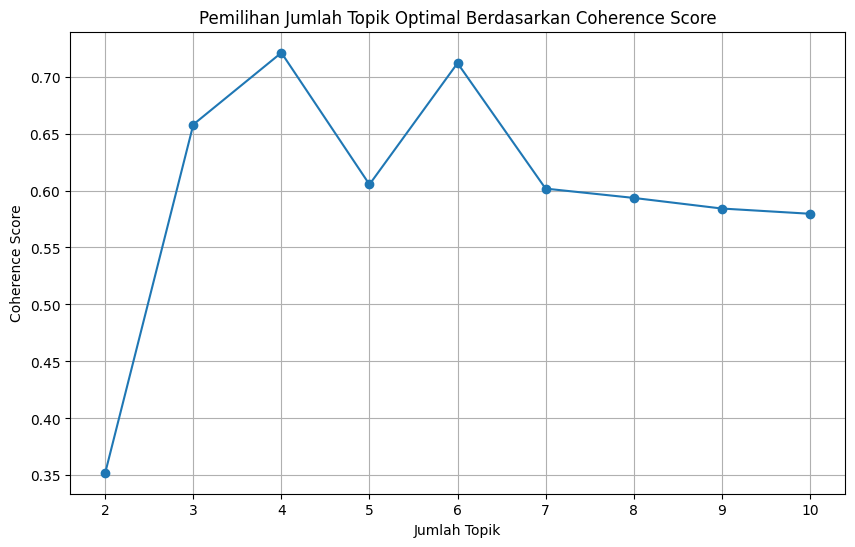

Jumlah Topik Optimal berdasarkan Coherence Score: 4
=== Topik dan Kata Kunci ===

Topik 1:
baru, energi, tahun, terbarukan, semangat, langkah, transisi, selamat, lebih, menuju


Topik 2:
baru, sebuah, tahun, energi, perubahan, langkah, hidup, saatnya, kecil, electrizen


Topik 3:
energi, rakyat, bumi, gas, indonesia, bersih, solusi, terjangkau, tahun, gasuntukrakyat


Topik 4:
pln, energi, esdm, penghargaan, kementerian, climate, transisi, change, melalui, terbarukan


=== Topik dalam Bentuk Tabel ===

     Topik                                         Kata Kunci
0  Topik 1  baru, energi, tahun, terbarukan, semangat, lan...
1  Topik 2  baru, sebuah, tahun, energi, perubahan, langka...
2  Topik 3  energi, rakyat, bumi, gas, indonesia, bersih, ...
3  Topik 4  pln, energi, esdm, penghargaan, kementerian, c...


In [4]:
# 1. Persiapan Data untuk Pemodelan
# Tokenisasi dan representasi numerik menggunakan CountVectorizer dengan stop words
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words=stop_words_indonesia  # Menggunakan stop words yang telah didefinisikan
)
text_data_matrix = vectorizer.fit_transform(data_cleaned['Cleaned Tweet'])
feature_names = vectorizer.get_feature_names_out()

# Konversi data ke format yang diperlukan oleh gensim
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# Tokenisasi
tokenized_text = data_cleaned['Cleaned Tweet'].apply(lambda x: x.split())

# Membuat dictionary dan corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# 2. Menentukan Jumlah Topik secara Sistematis menggunakan Coherence Score
coherence_scores = []
topic_range = range(2, 11)  # Misalnya, mencoba dari 2 hingga 10 topik

for num_topics in topic_range:
    # Inisialisasi dan fit model LDA dengan gensim
    lda_model_gensim = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        eta='auto'
    )

    # Menghitung coherence score
    coherence_model = CoherenceModel(model=lda_model_gensim, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f'Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}')

# 3. Visualisasi Coherence Score untuk Menentukan Jumlah Topik Optimal
plt.figure(figsize=(10, 6))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.title("Pemilihan Jumlah Topik Optimal Berdasarkan Coherence Score")
plt.xticks(topic_range)
plt.grid(True)
plt.show()

# 4. Memilih Jumlah Topik dengan Coherence Score Tertinggi
optimal_n_topics = topic_range[np.argmax(coherence_scores)]
print(f'Jumlah Topik Optimal berdasarkan Coherence Score: {optimal_n_topics}')

# 5. Implementasi Model LDA dengan Jumlah Topik Optimal
lda_model = LatentDirichletAllocation(n_components=optimal_n_topics, random_state=42, max_iter=10)
lda_model.fit(text_data_matrix)

# Mendapatkan kata-kata kunci untuk setiap topik
words = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords = [words[i] for i in topic.argsort()[:-11:-1]]
    topic_keywords.append({"Topik": f"Topik {topic_idx+1}", "Kata Kunci": top_keywords})

# 6. Evaluasi Model - Coherence sederhana berdasarkan top keywords per topik

# Metode 1: Menampilkan dengan Penomoran dan Pemformatan yang Jelas
print("=== Topik dan Kata Kunci ===\n")
for idx, topic in enumerate(topic_keywords, 1):
    print(f"Topik {idx}:")
    print(", ".join(topic['Kata Kunci']))
    print("\n")

# Metode 2: Menampilkan dengan Pandas DataFrame
df_topics = pd.DataFrame(topic_keywords)
df_topics['Kata Kunci'] = df_topics['Kata Kunci'].apply(lambda x: ', '.join(x))
print("=== Topik dalam Bentuk Tabel ===\n")
print(df_topics)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


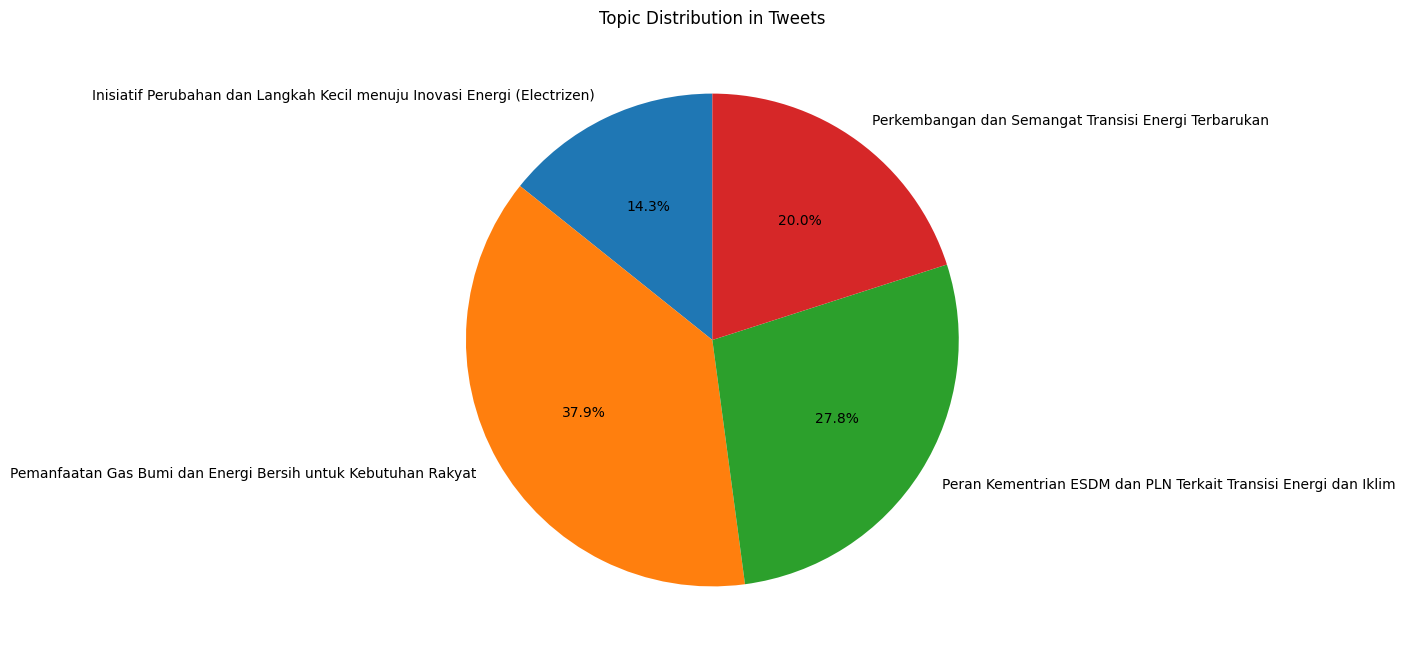

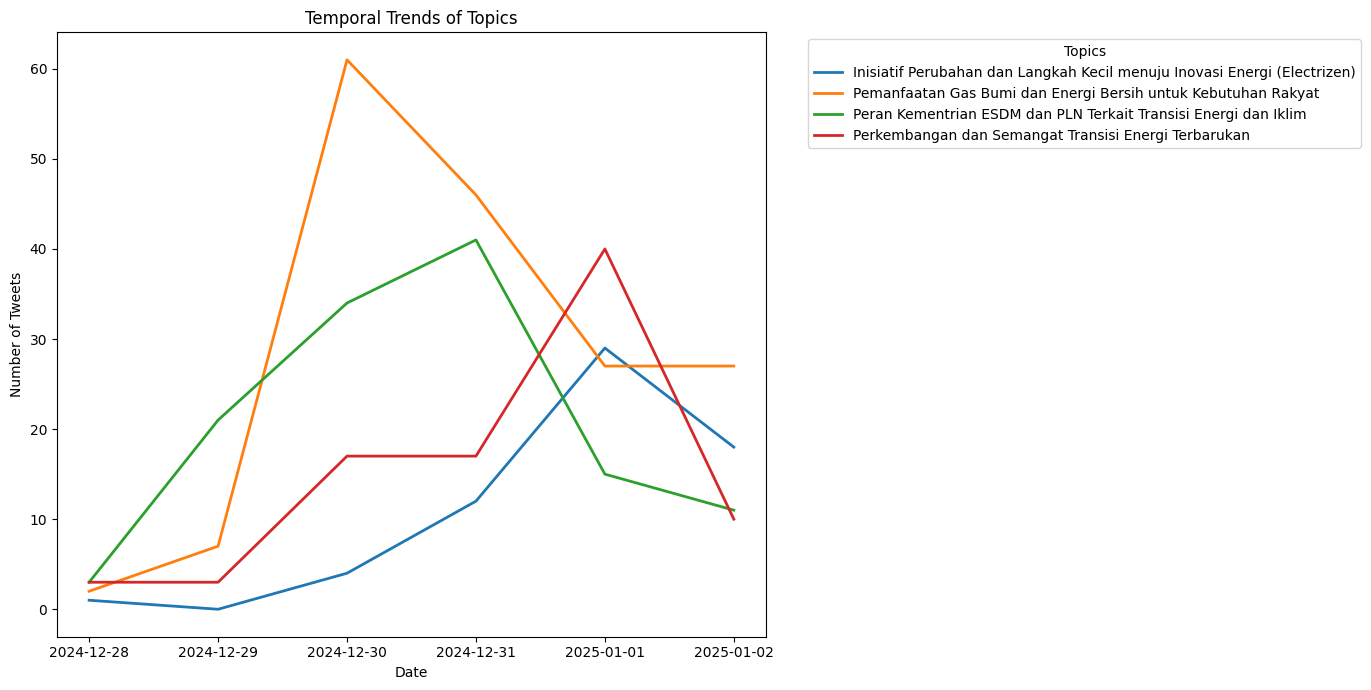

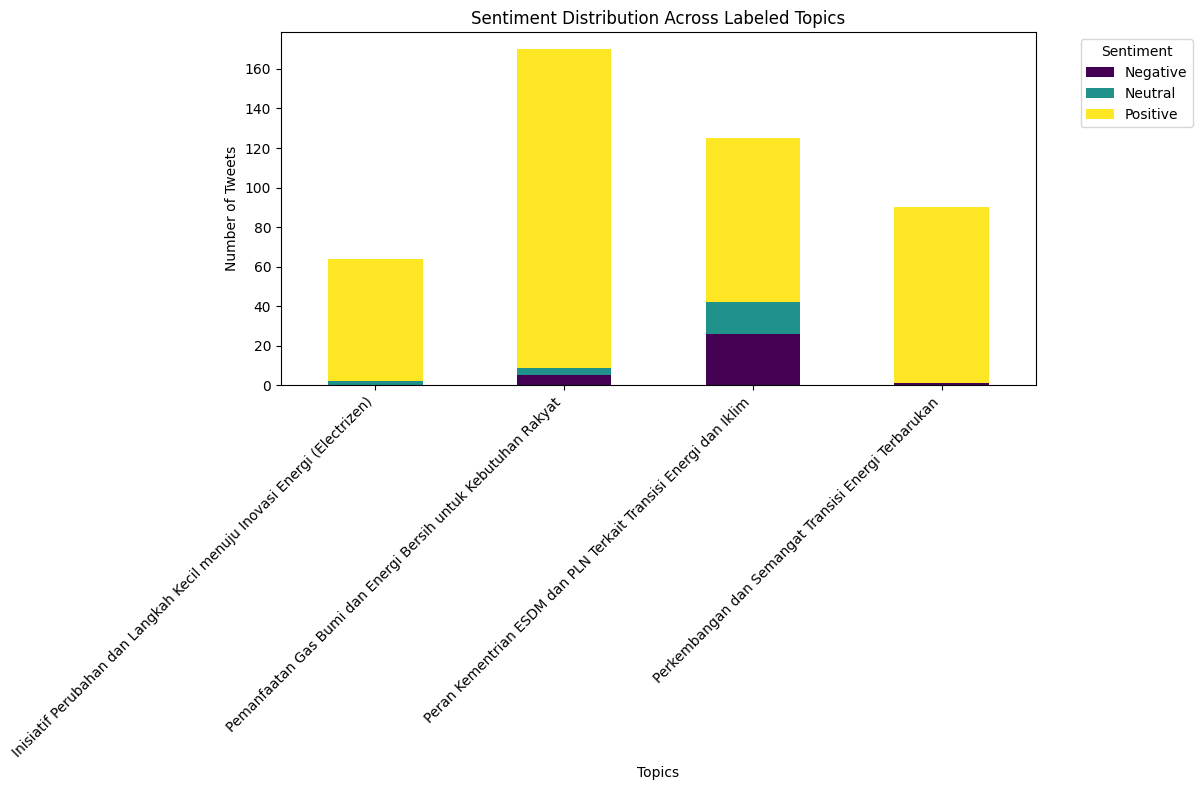

Summary of Findings:

1. Topic Distribution Analysis:
   - Inisiatif Perubahan dan Langkah Kecil menuju Inovasi Energi (Electrizen): 14.25%
   - Pemanfaatan Gas Bumi dan Energi Bersih untuk Kebutuhan Rakyat: 37.86%
   - Peran Kementrian ESDM dan PLN Terkait Transisi Energi dan Iklim: 27.84%
   - Perkembangan dan Semangat Transisi Energi Terbarukan: 20.04%


2. Temporal Trend Analysis:
   2024-12-28 - Inisiatif Perubahan dan Langkah Kecil menuju Inovasi Energi (Electrizen): 1 tweets
   2024-12-28 - Pemanfaatan Gas Bumi dan Energi Bersih untuk Kebutuhan Rakyat: 2 tweets
   2024-12-28 - Peran Kementrian ESDM dan PLN Terkait Transisi Energi dan Iklim: 3 tweets
   2024-12-28 - Perkembangan dan Semangat Transisi Energi Terbarukan: 3 tweets
   2024-12-29 - Pemanfaatan Gas Bumi dan Energi Bersih untuk Kebutuhan Rakyat: 7 tweets
   2024-12-29 - Peran Kementrian ESDM dan PLN Terkait Transisi Energi dan Iklim: 21 tweets
   2024-12-29 - Perkembangan dan Semangat Transisi Energi Terbarukan: 3 tweet

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd
import nltk

# Download corpora yang dibutuhkan
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.sentiment import SentimentIntensityAnalyzer
from typing import Tuple, Optional

#!pip uninstall googletrans -y
#!pip install googletrans==4.0.0-rc1

from googletrans import Translator

# ----------------------------
# 1. Topic Distribution Analysis
# ----------------------------
topic_distribution = lda_model.transform(text_data_matrix)
topic_proportions = topic_distribution.sum(axis=0)
topic_proportions_normalized = normalize(topic_proportions.reshape(1, -1), norm='l1')[0]

data_cleaned['Dominant Topic'] = topic_distribution.argmax(axis=1)

topic_labels = {
    0: "Perkembangan dan Semangat Transisi Energi Terbarukan",
    1: "Inisiatif Perubahan dan Langkah Kecil menuju Inovasi Energi (Electrizen)",
    2: "Pemanfaatan Gas Bumi dan Energi Bersih untuk Kebutuhan Rakyat",
    3: "Peran Kementrian ESDM dan PLN Terkait Transisi Energi dan Iklim"
}

data_cleaned['Labeled Topic'] = data_cleaned['Dominant Topic'].map(topic_labels)

labeled_topic_proportions = data_cleaned['Labeled Topic'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 8))
labeled_topic_proportions.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Topic Distribution in Tweets")
plt.ylabel("")
plt.show()

# ----------------------------
# 2. Temporal Trend Analysis
# ----------------------------
data_cleaned['Date Created'] = pd.to_datetime(data_cleaned['Date Created'])
temporal_labeled_trend = data_cleaned.groupby(
    [data_cleaned['Date Created'].dt.date, 'Labeled Topic']
).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
temporal_labeled_trend.plot(ax=plt.gca(), linewidth=2)
plt.title("Temporal Trends of Topics")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Sentiment Analysis
# ----------------------------

# (A) Inisialisasi Translator & VADER
translator = Translator()
sia = SentimentIntensityAnalyzer()

def translate_to_english(text: str) -> str:
    try:
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        print(f"Terjadi error saat menerjemahkan: {e}")
        return text

def analyze_sentiment(
    text: str,
    threshold: float = 0.1
) -> Tuple[str, float]:
    if not isinstance(text, str):
        raise ValueError("Input must be a string")
    if not text.strip():
        raise ValueError("Input cannot be empty")

    # 1. Translate to English
    text_en = translate_to_english(text)

    # 2. Sentiment scores by VADER
    scores = sia.polarity_scores(text_en.strip())
    compound_score = scores['compound']

    # 3. Category
    if abs(compound_score) < threshold:
        category = "Neutral"
    elif compound_score > 0:
        category = "Positive"
    else:
        category = "Negative"
    return category, compound_score

# (B) Aplikasikan ke DataFrame
data_cleaned[['Sentiment Category', 'Sentiment Score']] = data_cleaned['Cleaned Tweet'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# (C) Visualisasi Distribution Across Labeled Topics
sentiment_labeled_distribution = data_cleaned.groupby(['Labeled Topic', 'Sentiment Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sentiment_labeled_distribution.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title("Sentiment Distribution Across Labeled Topics")
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Summary of Findings
# ----------------------------
# Kita bisa menambahkan ringkasan distribusi sentimen secara keseluruhan,
# dan/atau distribusi sentiment per topik juga.

# Menghitung distribusi tweet berdasarkan tanggal (untuk ringkasan Temporal Trend)
tweet_distribution = data_cleaned['Date Created'].dt.date.value_counts().sort_index()

# Menghitung distribusi temporal per topik untuk ringkasan
temporal_trend_per_topic_summary = temporal_labeled_trend.sum().sort_values(ascending=False)

summary = {
    "topic_distribution": labeled_topic_proportions.to_dict(),
    "temporal_trend_overall": tweet_distribution,  # Simpan sebagai Series
    "temporal_trend_per_topic": temporal_trend_per_topic_summary,  # Distribusi per topik
    "sentiment_distribution": data_cleaned["Sentiment Category"].value_counts().to_dict(),
    "sentiment_by_topic": sentiment_labeled_distribution.to_dict()
}

print("Summary of Findings:\n")

# 1. Topic Distribution Analysis
print("1. Topic Distribution Analysis:")
for topic, proportion in summary["topic_distribution"].items():
    print(f"   - {topic}: {proportion:.2%}")
print("\n")

# 2. Temporal Trend Analysis
print("2. Temporal Trend Analysis:")
temporal_grouped = data_cleaned.groupby(
    [data_cleaned['Date Created'].dt.date, 'Labeled Topic']
).size()

for (date, topic), count in temporal_grouped.items():
    print(f"   {date} - {topic}: {count} tweets")
print("\n")

# 3. Sentiment Analysis
print("3. Sentiment Analysis:")
print("   a. Overall Sentiment Distribution:")
for sentiment, count in summary["sentiment_distribution"].items():
    print(f"      - {sentiment}: {count} tweets")
print("   b. Sentiment Distribution by Topic:")
for topic, sentiments in summary["sentiment_by_topic"].items():
    print(f"      - {topic}:")
    for sentiment, count in sentiments.items():
        print(f"         * {sentiment}: {count} tweets")
print("\n")